## Importing all the necessary libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from scipy import stats
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn import metrics
from sklearn import datasets
from sklearn.linear_model import LogisticRegression

## Loading the dataset 
Now, after importing the necessary libraries, we now need to import the dataset onto which we are going to work, and run the classification models to predict the heart attack for any random dataset

In [3]:
#Loading the dataset
data = pd.read_csv('heart.csv')
data = pd.DataFrame(data)

# Some information about the data
data.shape
#data.info()
#data.head()

(303, 14)

## Data Preprocessing
Here, we will perform some operations of the given dataset to check whether the dataset contains any:
    1. Null Values/Missing Values
    2. Duplicate values
    3. Outliers
    
And if there are any anomalies in the given data, we'll remove it using respective techniques

In [4]:
# Checking if the dataset contains any null value or not
print(f"Null values:\n",data.isnull().sum())

# Checking if the dataset contains duplicate values in any row
duplicate_rows = data[data.duplicated()]
print("Number of duplicate rows before dropping them: ", duplicate_rows.shape)   

# Since we have one duplicate row, we dropped that particular row
data = data.drop_duplicates()

duplicate_rows = data[data.duplicated()]
print("Number of duplicate rows after dropping them: ", duplicate_rows.shape)  

# Now, we check for the outliers in the data if they exist
headers = ['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh', 'exng', 'oldpeak', 'slp', 'caa', 'thall']

# If you want to see the all box plots in a single frame, you can loop through them
#for i in range(len(headers)):
  #  sns.boxplot(x = data[headers[i]])
    
# Now we'll observe boxplot for each of the features

Null values:
 age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64
Number of duplicate rows before dropping them:  (1, 14)
Number of duplicate rows after dropping them:  (0, 14)


<AxesSubplot:xlabel='age'>

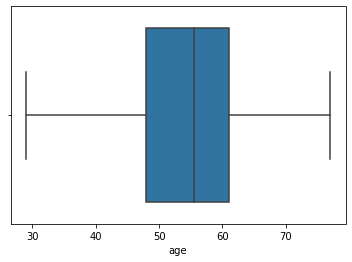

In [5]:
sns.boxplot(x = data['age'])

<AxesSubplot:xlabel='sex'>

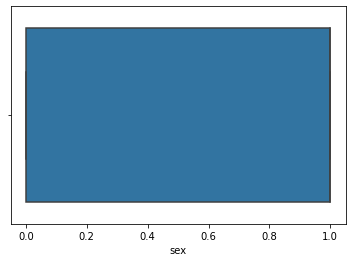

In [73]:
sns.boxplot(x = data['sex'])

<AxesSubplot:xlabel='cp'>

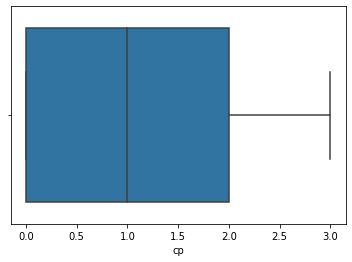

In [74]:
sns.boxplot(x = data['cp'])

<AxesSubplot:xlabel='trtbps'>

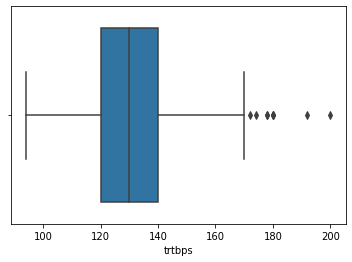

In [75]:
sns.boxplot(x = data['trtbps'])

<AxesSubplot:xlabel='chol'>

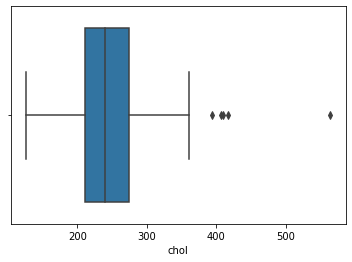

In [76]:
sns.boxplot(x = data['chol'])

<AxesSubplot:xlabel='fbs'>

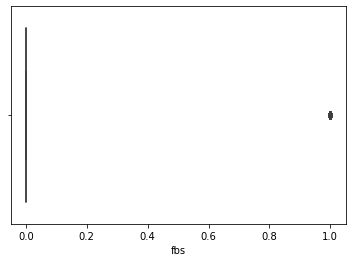

In [77]:
sns.boxplot(x = data['fbs'])

<AxesSubplot:xlabel='restecg'>

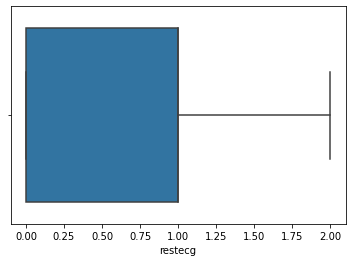

In [78]:
sns.boxplot(x = data['restecg'])

<AxesSubplot:xlabel='thalachh'>

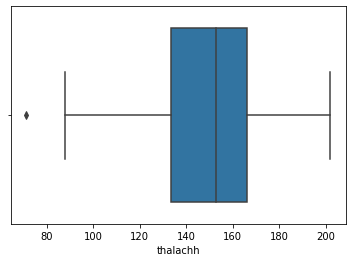

In [79]:
sns.boxplot(x = data['thalachh'])

<AxesSubplot:xlabel='exng'>

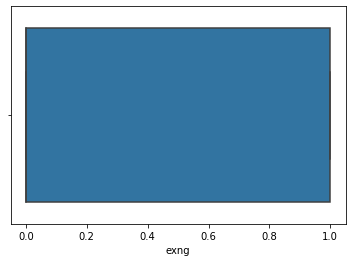

In [80]:
sns.boxplot(x = data['exng'])

<AxesSubplot:xlabel='oldpeak'>

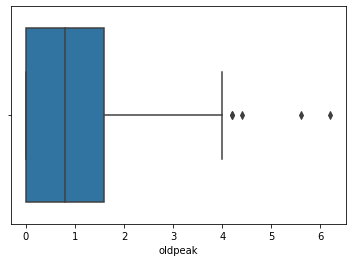

In [81]:
sns.boxplot(x = data['oldpeak'])

<AxesSubplot:xlabel='caa'>

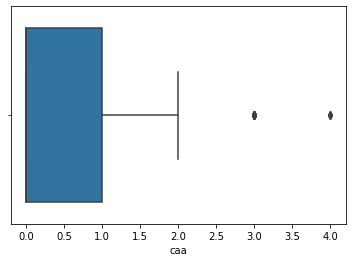

In [82]:
sns.boxplot(x = data['caa'])

<AxesSubplot:xlabel='thall'>

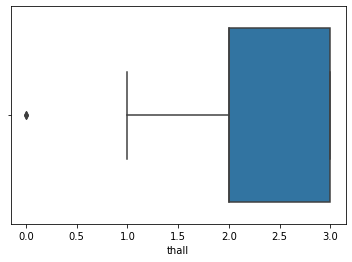

In [83]:
sns.boxplot(x = data['thall'])

In [8]:
# So after observing the boxplots of different columns, we can see that there exists some outliers
# So lets remove them
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)

# Calculating the IQR for each column
IQR = Q3-Q1

# Removing outliers
z_score = stats.zscore(data)
z = np.abs(z_score)
new_data = data[(z<3).all(axis=1)]

new_data.shape

(287, 14)

## Building Models for classification

In [108]:
# Now, building models for classification
x = new_data.drop("output", axis=1)
y = new_data['output']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

# Logistic Regression
log_reg = LogisticRegression(random_state=0, solver='liblinear')
log_reg.fit(x_train, y_train)
yhat_log_reg = log_reg.predict(x_test)
print(f"Predicted classes using Logistic Regression: ", yhat_log_reg)

print('')

# Random Forest
rand_for = RandomForestClassifier(n_estimators=500)
rand_for.fit(x_train,y_train)
yhat_rand_for = rand_for.predict(x_test)
print(f"Predicted classes using random forest: ", yhat_rand_for)

Predicted classes using Logistic Regression:  [1 1 1 1 0 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 0 0 1 1 1 0 0 1 0 0 1 0 1
 1 1 1 1 0 1 1 1 1 1 0 1 0 0 1 1 0 1 1 0 0 1 1 1 0 0 0 0 1 1 1 0 0 1 0 0 1
 1 1 1 1 0 1 1 1 1 1 0 1 0]

Predicted classes using random forest:  [1 1 1 1 0 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 0 0 1 1 1 0 0 1 0 0 1 0 1
 1 1 0 1 0 1 1 1 1 1 0 1 0 0 1 0 0 1 1 0 0 1 1 1 0 0 0 0 1 1 1 0 0 1 0 0 1
 1 1 1 1 0 1 1 1 1 1 1 1 0]


## Checking accuracies of the classifiers

In [109]:
#Models and their accuracy
print("Logistic Regression :: ", metrics.accuracy_score(y_test,yhat_log_reg))
print("Random Forest :: ", metrics.accuracy_score(y_test, yhat_rand_for))

Logistic Regression ::  0.8390804597701149
Random Forest ::  0.8275862068965517
